## Deteksi Tepi

# Import Library

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
image = cv2.imread('parkiran.jpg')
image.shape

(799, 1200, 3)

Text(0.5, 1.0, 'Grayscale Image')

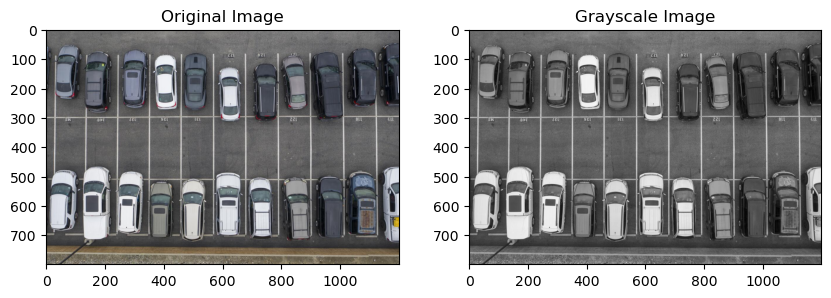

In [9]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

ax = axs.ravel()
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Grayscale Image')

## Mendeteksi ambang batas tepi menggunakan metode Canny

Text(0.5, 1.0, 'Canny Edges')

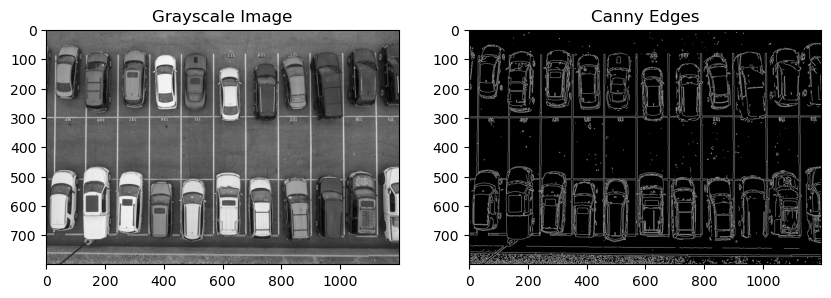

In [12]:
edges = cv2.Canny(img_gray, 100, 150)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Grayscale Image')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny Edges')

In [14]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)
img_lines = image.copy()

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_lines, (x1, y1), (x2, y2), (100, 80, 255), 1)

Text(0.5, 1.0, 'Hough Lines')

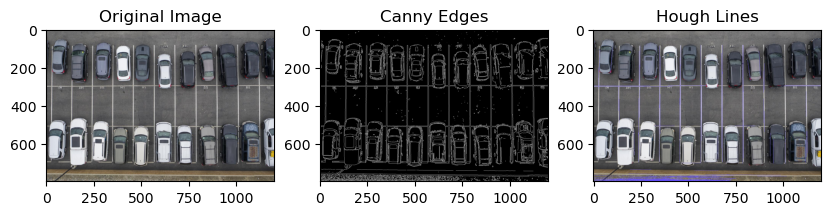

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny Edges')
ax[2].imshow(img_lines)
ax[2].set_title('Hough Lines')

## Operasi Geomatrik

# baca gambar

In [20]:
img_jet = cv2.imread('tahusumedang.png.jpg')
rows, cols = img_jet.shape[:2]
print('img shape:', img_jet.shape)

img shape: (375, 500, 3)


## Cara 1

Text(0.5, 1.0, 'Resized Image')

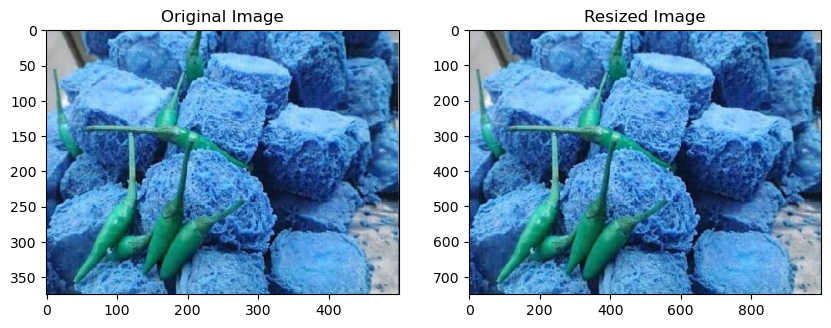

In [23]:
res = cv2.resize(img_jet, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(img_jet)
ax[0].set_title('Original Image')
ax[1].imshow(res)
ax[1].set_title('Resized Image')

## Cara 2

tinggi: 375 lebar: 500


Text(0.5, 1.0, 'Resized Image (4x)')

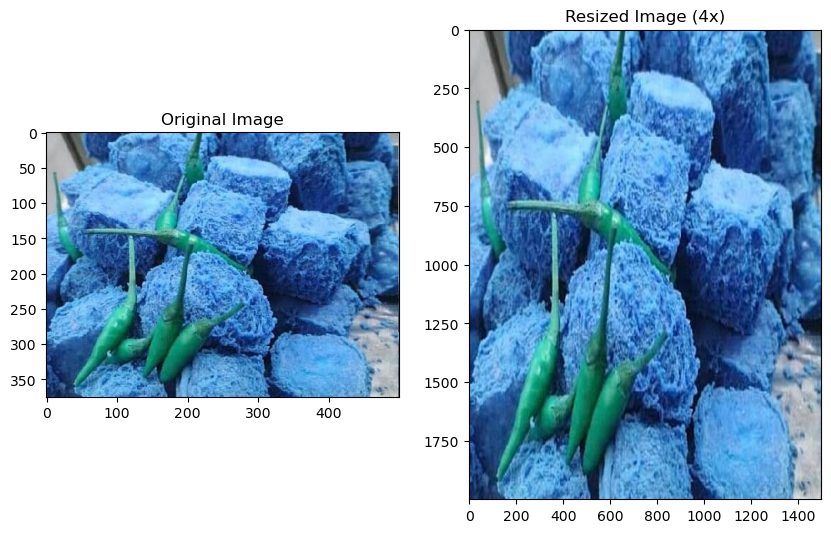

In [26]:
tinggi, lebar = img_jet.shape[:2]
print('tinggi:', tinggi, 'lebar:', lebar)
res2 = cv2.resize(img_jet, (4*tinggi, 4*lebar), interpolation=cv2.INTER_CUBIC)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(img_jet)
ax[0].set_title('Original Image')
ax[1].imshow(res2)
ax[1].set_title('Resized Image (4x)')

## Perputaran citra / rotasi

In [29]:
img_tahusumedang = cv2.imread('tahusumedang.png.jpg')
rows, cols = img_tahusumedang.shape[:2]
print('img shape:', img_tahusumedang.shape)

img shape: (375, 500, 3)


## Cara 1

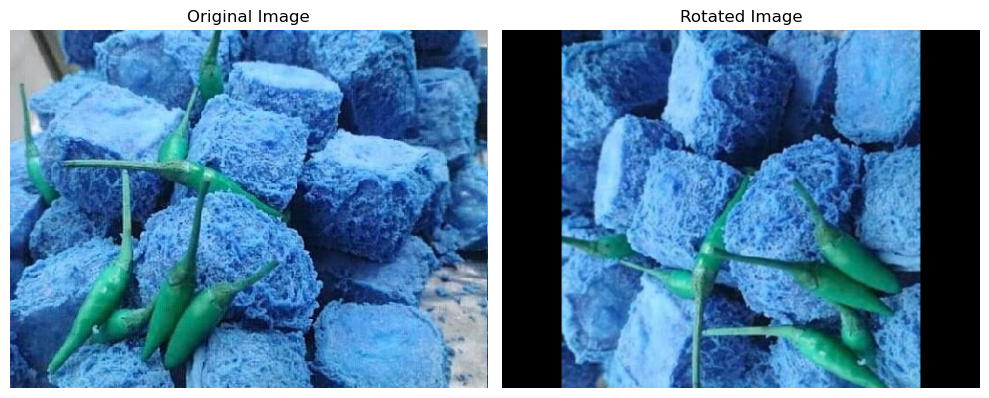

In [32]:
M = cv2.getRotationMatrix2D(((cols-1)/2, (rows-1)/2), 90, 1)
img_putar = cv2.warpAffine(img_tahusumedang, M, (cols, rows))

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(img_tahusumedang)
ax[0].set_title('Original Image')
ax[1].imshow(img_putar)
ax[1].set_title('Rotated Image')

for a in axs:
    a.axis('off')
plt.tight_layout()
plt.show()

## Cara 2

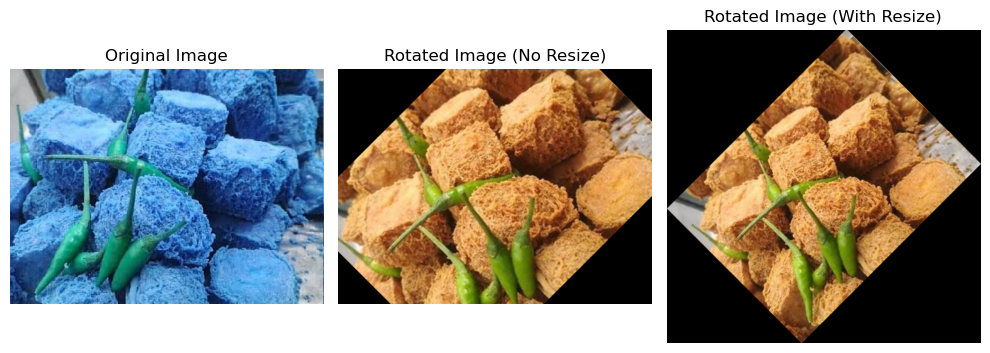

In [35]:
from skimage import io, transform
img_tahusumedang2 = io.imread('tahusumedang.png.jpg')
rotated = transform.rotate(img_tahusumedang2, 45, resize=False)
rotated2 = transform.rotate(img_tahusumedang2, 45, resize=True)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(img_tahusumedang)
ax[0].set_title('Original Image')
ax[1].imshow(rotated)
ax[1].set_title('Rotated Image (No Resize)')
ax[2].imshow(rotated2)
ax[2].set_title('Rotated Image (With Resize)')
for a in axs:
    a.axis('off')
plt.tight_layout()
plt.show()

## Pengaplikasian

Text(0.5, 1.0, 'Grayscale Image')

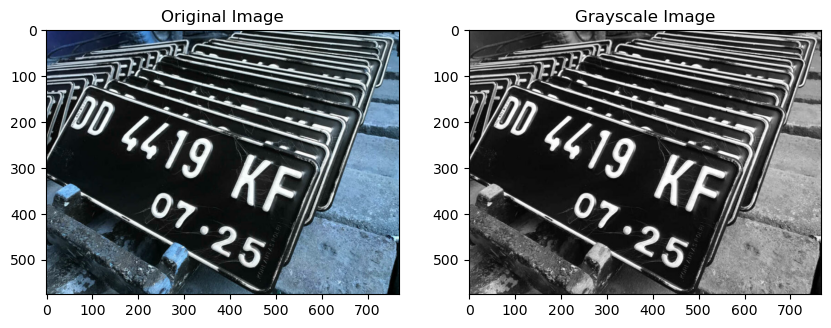

In [38]:
t = cv2.imread('plat.jpg')
t_gray = cv2.cvtColor(t, cv2.COLOR_BGR2GRAY)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(t)
ax[0].set_title('Original Image')
ax[1].imshow(t_gray, cmap='gray')
ax[1].set_title('Grayscale Image')

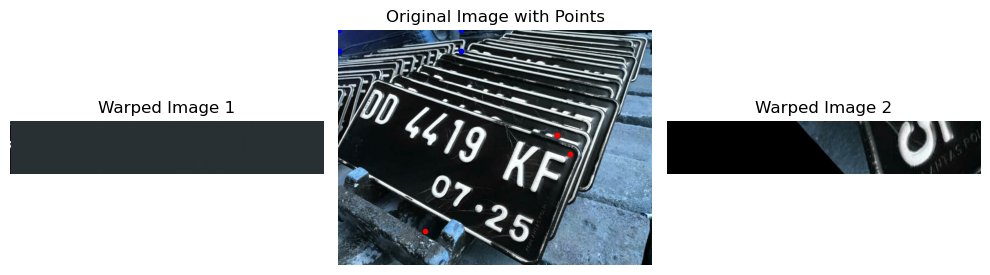

In [44]:
src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
crp = np.array([[212, 493], [567, 303], [535, 256], [535, 256]])
crp2 = np.array([[165, 682], [199, 722], [529, 469], [496, 432]])

tform = transform.ProjectiveTransform()
tform.estimate(src, crp)
tform2 = transform.ProjectiveTransform()
tform2.estimate(src, crp2)

warped = transform.warp(t, tform, output_shape=(50, 300))
warped2 = transform.warp(t, tform2, output_shape=(50, 300))

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(warped)
ax[0].set_title('Warped Image 1')
ax[1].imshow(t)
ax[1].plot(crp[:, 0], crp[:, 1], '.r')
ax[1].plot(src[:, 0], src[:, 1], '.b')
ax[1].set_title('Original Image with Points')

ax[2].imshow(warped2)
ax[2].set_title('Warped Image 2')
for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show()